The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

We seek to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Importing all the necessary modules

In [1]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#pickling
import pickle

Reading the datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


We are checking if there is any correlation between Pclass and Survival  

In [7]:
train[['Pclass','Survived']].groupby(['Pclass'] , as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


We can observe that 62% of the people from the first class survived , and 47% of the people survived from the second class , while only 24% of the people from the third class survived , **hence Pclass is an influential factor**

In [8]:
train[['Sex','Survived']].groupby(['Sex'] , as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


We observe that only 18% of the males survived whereas 74% of the females survived .**So Sex is an important factor to be considered**

In [9]:
train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass'] , as_index=True).mean().sort_values(by='Survived',ascending=False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

We notice a decline in survival rate down the classes , so a female in 1st class will be guaranteed to survive whereas a man in the lower classes are doomed!

In [10]:
train[['Embarked','Survived']].groupby(['Embarked'] , as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


There are 3 stations for embarking namingly Cherbourg(C) , Queenstown(Q) and Southampton(S) , we observe that embarking at cherbourg gives a 50-50 chance of survival , while the others are slightly slim 

In [11]:
train[['Pclass','Embarked','Survived']].groupby(['Embarked','Pclass'] , as_index=True).mean().sort_values(by='Survived',ascending=False)

,,Survived
Embarked,Pclass,
C,1,0.694118
Q,2,0.666667
S,1,0.582677
C,2,0.529412
Q,1,0.500000
S,2,0.463415
C,3,0.378788
Q,3,0.375000
S,3,0.189802


We find the count of number of passengers in each class

In [12]:
train[['Pclass','Embarked','PassengerId']].groupby(['Embarked','Pclass'] , as_index=True).count().sort_values(by='Embarked',ascending=True)

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

We find the split up between male & female in the population respective to Pclass

In [13]:
train[['Sex','Embarked','PassengerId']].groupby(['Embarked','Sex'] , as_index=True).count().sort_values(by='Embarked',ascending=True)

PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441

We find the split up between male & female in the population with respect to their embarked station 

In [14]:
train[['Sex','Embarked','Survived']].groupby(['Embarked','Sex'] , as_index=True).mean().sort_values(by='Survived',ascending=False)

,,Survived
Embarked,Sex,
C,female,0.876712
Q,female,0.750000
S,female,0.689655
C,male,0.305263
S,male,0.174603
Q,male,0.073171


<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

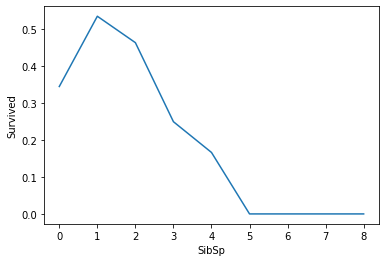

In [15]:
sibsp = train[['SibSp','Survived']].groupby(['SibSp'] , as_index=True).mean().sort_values(by='Survived',ascending=False)
sns.lineplot(data=sibsp ,x='SibSp',y='Survived')

We observe that having a sibling and survival doesnt correlate well , having 0-2 siblings have a good survival chance , but it steeps down rapidly

<AxesSubplot: xlabel='Parch', ylabel='Survived'>

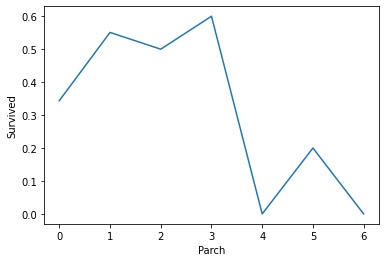

In [16]:
parch = train[['Parch','Survived']].groupby(['Parch'] , as_index=True).mean().sort_values(by='Survived',ascending=False)
sns.lineplot(data=parch ,x='Parch',y='Survived')

Similiar to SibSp , Parch also doesnt have a steady curve , so we exclude these factors by replacing them with 'FamilySize'

<AxesSubplot: xlabel='FamilySize', ylabel='Survived'>

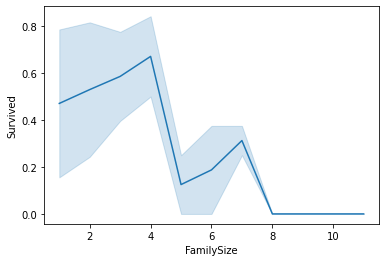

In [17]:
for i in combine:
    i['FamilySize'] = i['SibSp'] + i['Parch'] + 1
familysize = train[['FamilySize','Sex','Survived']].groupby(['Sex','FamilySize'] , as_index=True).mean().sort_values(by='Survived',ascending=False)
#familysize
sns.lineplot(data=familysize ,x='FamilySize',y='Survived')

<AxesSubplot: xlabel='FamilySize', ylabel='Survived'>

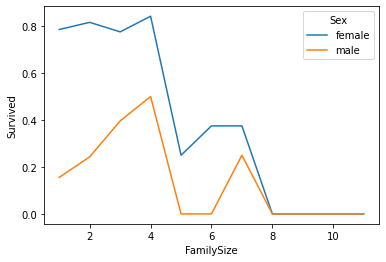

In [18]:
sns.lineplot(data=familysize,x='FamilySize',y='Survived',hue='Sex')

We observe that survival decreases with increase in FamilySize with few deviations in the curve

We find the count of passengers in each FamilySize

In [19]:
train[['FamilySize','PassengerId']].groupby(['FamilySize'],as_index=True).count()

,PassengerId
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


Since there a substantial amount of people being alone , we use another factor 'IsAlone' 

In [20]:
for i in combine:
    i['IsAlone'] = 0
    i.loc[i['FamilySize']==1,'IsAlone'] = 1
train[['IsAlone','Survived']].groupby(['IsAlone'] , as_index=True).mean()
#sns.lineplot(data=familysize ,x='FamilySize',y='Survived')

,Survived
IsAlone,
0,0.505650
1,0.303538


We observe that being alone gives you a 50% chance of survival

In [21]:
train[['IsAlone','Sex','Survived']].groupby(['Sex','IsAlone'] , as_index=True).mean()

Survived
Sex    IsAlone          
female 0        0.712766
       1        0.785714
male   0        0.271084
       1        0.155718

Since we can include being alone in the family size itself we can drop IsAlone and also SibSp & Parch

In [22]:
train = train.drop(['Parch','SibSp','IsAlone'], axis=1)
test = test.drop(['Parch','SibSp','IsAlone'], axis=1)
combine = [train,test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


Age is a broad category to correlate , so we split age into small sub categories 'CategoricalAge'

In [23]:
for i in combine:
    i['CategoricalAge'] = pd.qcut(train['Age'],15)
categoricalage = train[['CategoricalAge','Survived']].groupby(['CategoricalAge'] , as_index=True).mean()
categoricalage

,Survived
CategoricalAge,
"(0.419, 7.0]",0.680000
"(7.0, 16.0]",0.420000
"(16.0, 19.0]",0.375000
"(19.0, 21.0]",0.200000
"(21.0, 23.0]",0.380952
"(23.0, 25.0]",0.381818
"(25.0, 27.0]",0.472222
"(27.0, 29.0]",0.319149
"(29.0, 31.8]",0.409091


<AxesSubplot: >

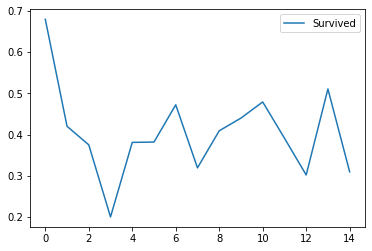

In [24]:
categoricalage = train[['CategoricalAge','Survived']].groupby(['CategoricalAge'] , as_index=False).mean()
sns.lineplot(data=categoricalage)

We can observe that children have a high survival rate as compared to adults

We check the relationship between CategoricalAge and Sex in survival

In [25]:
train[['CategoricalAge','Sex','Survived']].groupby(['Sex','CategoricalAge'] , as_index=True).mean()

Survived
Sex    CategoricalAge          
female (0.419, 7.0]    0.750000
       (7.0, 16.0]     0.600000
       (16.0, 19.0]    0.769231
       (19.0, 21.0]    0.444444
       (21.0, 23.0]    0.823529
       (23.0, 25.0]    0.761905
       (25.0, 27.0]    0.727273
       (27.0, 29.0]    0.714286
       (29.0, 31.8]    0.736842
       (31.8, 34.0]    0.928571
       (34.0, 37.0]    0.937500
       (37.0, 41.0]    0.714286
       (41.0, 47.0]    0.625000
       (47.0, 54.0]    0.888889
       (54.0, 80.0]    0.900000
male   (0.419, 7.0]    0.615385
       (7.0, 16.0]     0.240000
       (16.0, 19.0]    0.105263
       (19.0, 21.0]    0.129032
       (21.0, 23.0]    0.080000
       (23.0, 25.0]    0.147059
       (25.0, 27.0]    0.360000
       (27.0, 29.0]    0.151515
       (29.0, 31.8]    0.160000
       (31.8, 34.0]    0.250000
       (34.0, 37.0]    0.250000
       (37.0, 41.0]    0.120000
       (41.0, 47.0]    0.162162
       (47.0, 54.0]    0.275862
       (54.0, 80.0]    0.125000

<AxesSubplot: xlabel='CategoricalAge', ylabel='Survived'>

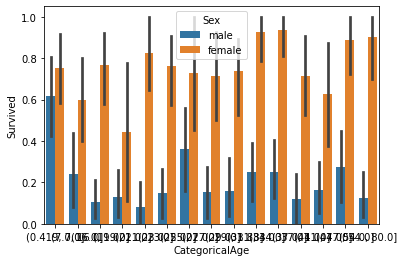

In [26]:
sns.barplot(data=train , x='CategoricalAge' , y='Survived',hue='Sex')

We include a factor 'IsKid'

In [27]:
for i in combine:
    i['IsKid'] = 0
    i.loc[i['Age'] <= 7 , 'IsKid'] = 1
train[['IsKid','Survived']].groupby(['IsKid'] , as_index=False).mean()

,IsKid,Survived
0,0,0.366231
1,1,0.680000


We observe that **being a child increases your chance by double!** 

Ticket has nothing to do with the survival rates so we drop ticket from the data

In [28]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)
combine = [train,test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,CategoricalAge,IsKid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2,"(21.0, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2,"(37.0, 41.0]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,"(25.0, 27.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2,"(34.0, 37.0]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,"(34.0, 37.0]",0


In [29]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can infere that most of them doesnt have a cabin and the name of the cabin is not of use to us , So we include a factor 'HasCabin' where all the null values of Cabin are designated as having no cabin

In [30]:
for i in combine:
    i['HasCabin'] = 1
    i.loc[i['Cabin'].isnull(), 'HasCabin'] = 0
train[['HasCabin','Survived']].groupby(['HasCabin'] , as_index=True).mean()

,Survived
HasCabin,
0,0.299854
1,0.666667


There's a significant difference in the survival rates between having and not having a cabin , **Hence HasCabin is an influential factor**

In [31]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
combine = [train,test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,"(21.0, 23.0]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,"(37.0, 41.0]",0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,"(25.0, 27.0]",0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,"(34.0, 37.0]",0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,"(34.0, 37.0]",0,0


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

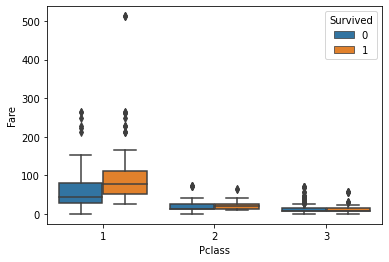

In [32]:
sns.boxplot(data=train,x='Pclass',y='Fare',hue='Survived')

We observe that fare value doesnt have any influence on the survival in 2 of the 3 Pclasses and slight correlation in the first class

In [33]:
for i in combine:
    i['Title'] = i.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We have classified the names into titles to check for any possible correlations

In [34]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [35]:
train[['Title','Pclass','Survived']].groupby(['Title','Pclass'],as_index=False).mean()

,Title,Pclass,Survived
0,Master,1,1.000000
1,Master,2,1.000000
2,Master,3,0.392857
3,Miss,1,0.958333
4,Miss,2,0.942857
5,Miss,3,0.500000
6,Mr,1,0.345794
7,Mr,2,0.087912
8,Mr,3,0.112853
9,Mrs,1,0.976744


In [36]:
train.loc[train['Age'].isnull()].groupby(['Title'], as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,Master,4,4,4,4,4,0,4,4,4,0,4,4
1,Miss,36,36,36,36,36,0,36,36,36,0,36,36
2,Mr,119,119,119,119,119,0,119,119,119,0,119,119
3,Mrs,17,17,17,17,17,0,17,17,17,0,17,17
4,Rare,1,1,1,1,1,0,1,1,1,0,1,1


We observe that there are few missing values in the age attribute

In [37]:
pd.crosstab(train['Title'],train['CategoricalAge'])

CategoricalAge,"(0.419, 7.0]","(7.0, 16.0]","(16.0, 19.0]","(19.0, 21.0]","(21.0, 23.0]","(23.0, 25.0]","(25.0, 27.0]","(27.0, 29.0]","(29.0, 31.8]","(31.8, 34.0]","(34.0, 37.0]","(37.0, 41.0]","(41.0, 47.0]","(47.0, 54.0]","(54.0, 80.0]"
Title,,,,,,,,,,,,,,,
Master,26,10,0,0,0,0,0,0,0,0,0,0,0,0,0
Miss,24,23,19,9,13,11,6,4,13,4,7,7,2,4,3
Mr,0,15,38,31,24,34,24,32,25,35,32,23,34,23,28
Mrs,0,2,7,0,4,10,5,10,6,9,9,14,14,12,7
Rare,0,0,0,0,1,0,1,1,0,2,0,2,3,8,4


In [38]:
train.groupby(['Title'], as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,Master,40,40,40,40,40,36,40,40,40,36,40,40
1,Miss,185,185,185,185,185,149,185,184,185,149,185,185
2,Mr,517,517,517,517,517,398,517,517,517,398,517,517
3,Mrs,126,126,126,126,126,109,126,125,126,109,126,126
4,Rare,23,23,23,23,23,22,23,23,23,22,23,23


In [39]:
train.loc[train['Title'] == 'Master']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,21.0750,S,5,"(0.419, 7.0]",1,0,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,29.1250,Q,6,"(0.419, 7.0]",1,0,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,46.9000,S,8,"(7.0, 16.0]",0,0,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,27.9000,S,6,"(0.419, 7.0]",1,0,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,15.2458,C,3,NaN,0,0,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,29.0000,S,3,"(0.419, 7.0]",1,0,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,11.2417,C,2,"(7.0, 16.0]",0,0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,69.5500,S,11,NaN,0,0,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master


In [40]:
for i in combine:
    i.loc[i['Title'] == 'Master' , 'IsKid'] = 1
train.loc[train['Title'] == 'Master']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,21.0750,S,5,"(0.419, 7.0]",1,0,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,29.1250,Q,6,"(0.419, 7.0]",1,0,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,46.9000,S,8,"(7.0, 16.0]",1,0,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,27.9000,S,6,"(0.419, 7.0]",1,0,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,15.2458,C,3,NaN,1,0,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,29.0000,S,3,"(0.419, 7.0]",1,0,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,11.2417,C,2,"(7.0, 16.0]",1,0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,69.5500,S,11,NaN,1,0,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master


Since name and passengerid pose us no use , we drop those

In [41]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 11), (418, 11))

In [42]:
train.shape , test.shape

((891, 11), (418, 11))

For computational reasons we assign females as 1 and males as 0

In [43]:
for i in combine:
    i['Sex'] = i['Sex'].map({'female':1 , 'male':0}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,0,3,0,22.0,7.2500,S,2,"(21.0, 23.0]",0,0,Mr
1,1,1,1,38.0,71.2833,C,2,"(37.0, 41.0]",0,1,Mrs
2,1,3,1,26.0,7.9250,S,1,"(25.0, 27.0]",0,0,Miss
3,1,1,1,35.0,53.1000,S,2,"(34.0, 37.0]",0,1,Mrs
4,0,3,0,35.0,8.0500,S,1,"(34.0, 37.0]",0,0,Mr


In [44]:
freqport = train.Embarked.dropna().mode()[0]
for i in combine:
    i['Embarked'] = i['Embarked'].fillna(freqport)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,0,3,0,22.0,7.2500,S,2,"(21.0, 23.0]",0,0,Mr
1,1,1,1,38.0,71.2833,C,2,"(37.0, 41.0]",0,1,Mrs
2,1,3,1,26.0,7.9250,S,1,"(25.0, 27.0]",0,0,Miss
3,1,1,1,35.0,53.1000,S,2,"(34.0, 37.0]",0,1,Mrs
4,0,3,0,35.0,8.0500,S,1,"(34.0, 37.0]",0,0,Mr


For computational purposes we assign the embarked stations (S-0 , C-1 , Q-2)

In [45]:
for i in combine:
    i['Embarked'] = i['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,0,3,0,22.0,7.2500,0,2,"(21.0, 23.0]",0,0,Mr
1,1,1,1,38.0,71.2833,1,2,"(37.0, 41.0]",0,1,Mrs
2,1,3,1,26.0,7.9250,0,1,"(25.0, 27.0]",0,0,Miss
3,1,1,1,35.0,53.1000,0,2,"(34.0, 37.0]",0,1,Mrs
4,0,3,0,35.0,8.0500,0,1,"(34.0, 37.0]",0,0,Mr


We drop all the unrequired attributes

In [46]:
train = train.drop(['Age', 'Fare', 'CategoricalAge', 'Title'], axis=1)
test = test.drop(['Age', 'Fare', 'CategoricalAge', 'Title'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 7), (418, 7))

In [66]:
train.describe()

,Survived,Pclass,Sex,Embarked,FamilySize,IsKid,HasCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.361392,1.904602,0.071829,0.228956
std,0.486592,0.836071,0.477990,0.635673,1.613459,0.258350,0.420397
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,2.000000,11.000000,1.000000,1.000000


In [47]:
train.head()

,Survived,Pclass,Sex,Embarked,FamilySize,IsKid,HasCabin
0,0,3,0,0,2,0,0
1,1,1,1,1,2,0,1
2,1,3,1,0,1,0,0
3,1,1,1,0,2,0,1
4,0,3,0,0,1,0,0


In [48]:
test.head()

,PassengerId,Pclass,Sex,Embarked,FamilySize,IsKid,HasCabin
0,892,3,0,2,1,0,0
1,893,3,1,0,2,0,0
2,894,2,0,2,1,0,0
3,895,3,0,0,1,0,0
4,896,3,1,0,3,0,0


Preparation of data is over

MACHINE LEARNING ALGORITHM IMPLEMENTATION

In [49]:
X_train = train.drop('Survived',axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 6), (891,), (418, 6))

LOGISTIC REGRESSION

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.38

In [51]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.875768
4,IsKid,2.604359
5,HasCabin,0.575597
2,Embarked,0.235839
3,FamilySize,-0.332492
0,Pclass,-0.818679


SUPPORT VECTOR MACHINES

In [52]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

KNEIGHBORS CLASSIFIER

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.51

GAUSSIAN NAIVE BAYES

In [54]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

PERCEPTRON

In [55]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

55.22

LINEAR SVC

In [56]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\aravind\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


82.27

STOCHASTIC GRADIENT DESCENT

In [57]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.41

DECISION TREE

In [58]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.52

RANDOM FOREST

In [59]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.52

ACCURACY OF ALL MODELS

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.52
8,Decision Tree,85.52
1,KNN,84.51
0,Support Vector Machines,83.28
2,Logistic Regression,82.38
7,Linear SVC,82.27
4,Naive Bayes,79.35
6,Stochastic Gradient Decent,74.41
5,Perceptron,55.22


In [61]:
output = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

output.to_csv('submission.csv', index=False)

PREDICTION

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#acc_random_forest
pickle.dump(random_forest , open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
model.predict([[1,2,0,1,2,0]])



c:\Users\aravind\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [63]:
#X_test

In [64]:
#Y_pred

In [65]:
random_forest.predict([[1,2,0,1,2,0]])

c:\Users\aravind\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)